<a href="https://colab.research.google.com/github/salimunlu47/scipy-chisquare-tests/blob/main/Chi_Square_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chi-Square Goodness-of-Fit Test

A website owner, Christopher, wants to offer a free gift to people that purchase a subscription to his website. New subscribers can choose one of three gifts of equal value: a gift voucher, a cuddly toy or free cinema tickets. After 900 people have signed up, Christopher wants to review the figures to see if the three gifts offered were equally popular.

In [ ]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import itertools

Create a numpy array

In [ ]:
e = ["Gift Certificate", "Cuddly Toy", "Cinema Tickets"]
n = [315, 265, 320]

it1 = np.array(list(itertools.repeat(e[0],n[0])))
it2 = np.array(list(itertools.repeat(e[1],n[1])))
it3 = np.array(list(itertools.repeat(e[2],n[2])))

it = [it1, it2, it3]
len(it)

3

In [ ]:
len(np.concatenate(it))

900

In [ ]:
gift_type = np.concatenate(it)

In [ ]:
unique_elements, counts_elements = np.unique(gift_type, return_counts=True)
unique_elements, counts_elements

(array(['Cinema Tickets', 'Cuddly Toy', 'Gift Certificate'], dtype='<U16'),
 array([320, 265, 315], dtype=int64))

## One-way Chi-square Test

<i>H<i/><sub>0</sub>: "there is no significant difference between the observed and the theoretival distribution"<br>
<i>H<i/><sub>1</sub>: "there is a significant difference between the observed and the theoretival distribution"

### Manuel Calculation

<table>
    <tbody>
        <tr>
            <td>&nbsp;</td>
            <td><em>Observed</em></td>
            <td><em>Expected</em></td>
            <td><em>Difference</em></td>
            <td><em>Difference Sq.</em></td>
            <td><em>Diff. Sq. / Exp Fr.</em></td>
        </tr>
        <tr>
            <td><span id="ctl00_MainContent_Label6"><b>Gift Certificate</b></span></td>
            <td><span id="ctl00_MainContent_Label100">315</span></td>
            <td><span id="ctl00_MainContent_Label105">300</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label110">15.00</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label115">225.00</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label120">0.75</span></td>
        </tr>
        <tr>
            <td><span id="ctl00_MainContent_Label7"><b>Cuddly Toy</b></span></td>
            <td><span id="ctl00_MainContent_Label101">265</span></td>
            <td><span id="ctl00_MainContent_Label106">300</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label111">-35.00</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label116">1225.00</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label121">4.08</span></td>
        </tr>
        <tr>
            <td><span id="ctl00_MainContent_Label8"><b>Cinema Tickets</b></span></td>
            <td><span id="ctl00_MainContent_Label102">320</span></td>
            <td><span id="ctl00_MainContent_Label107">300</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label112">20.00</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label117">400.00</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label122">1.33</span></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>&nbsp;</td>
            <td>&nbsp;</td>
            <td>&nbsp;</td>
        </tr>
        <tr>
            <td>&nbsp;</td>
            <td>&nbsp;</td>
            <td>&nbsp;</td>
            <td>&nbsp;</td>
            <td>&nbsp;</td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label125">6.167</span></td>
        </tr>
    </tbody>
</table>

In [ ]:
1 - stats.chi2.cdf(6.167, 2)

0.045798680423089544

### scipy.stats.chisquare

In [ ]:
test = stats.chisquare(counts_elements)
test

Power_divergenceResult(statistic=6.166666666666666, pvalue=0.04580631417262148)

![image.png](attachment:image.png)

In [ ]:
print('Statistics=%.3f, p=%.3f' % (test.statistic, test.pvalue))
# interpret
alpha = 0.05
if test.pvalue > alpha:
	print('there is no significant difference between the observed and the theoretical distribution (fail to reject H0)')
else:
	print('there is a significant difference between the observed and the theoretical distribution (reject H0)')

Statistics=6.167, p=0.046
there is a significant difference between the observed and the theoretical distribution (reject H0)


We can see that our test statistic is statistically significant: χ2(2) = 6.167, p < .05. Therefore, we can reject the null hypothesis and conclude that there are statistically significant differences in the preference of the type of sign-up gift.

# Chi-Square Test of Association

The Chi-Square Test of Independence determines whether there is an association between categorical variables (i.e., whether the variables are independent or related).

This test is also known as:
*Chi-Square Test of Independence*.

## PROBLEM STATEMENT

In the dataset, respondents were asked their gender and whether or not they were a cigarette smoker. There were three answer choices: Nonsmoker, Past smoker, and Current smoker. Suppose we want to test for an association between smoking behavior (nonsmoker, current smoker, or past smoker) and gender (male or female) using a Chi-Square Test of Independence (we'll use α = 0.05).

In [ ]:
survey = pd.read_csv('https://raw.githubusercontent.com/clarusway/clarusway-ds-students-7-21/main/3-%20Classes_Labs/Statistics/data/university_survey_2014.csv?token=APETIROZYARCUZFS4XM2F33ARM2D2')

In [ ]:
survey.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,,,,,0,0,72.35,,...,88.24,81.5,60.02,81.44,In state,1,,,7,1
1,20278,1/1/1995,,,,Philosophy,0,0,70.66,179.2,...,89.45,85.25,70.19,73.27,,1,,,5,2
2,20389,12/31/1994,,,,,0,0,70.68,198.52,...,96.73,86.88,71.2,84.24,In state,,,,8,7
3,22820,12/1/1994,,,,business administration,1,0,,198.34,...,74.06,88.68,55.89,73.16,In state,1,,,2,6
4,24559,11/10/1994,,,,,1,1,67.43,128.17,...,82.61,77.3,65.52,80.45,Out of state,1,,,7,3


In [ ]:
test = ["Gender", "Smoking"]

testset = survey[test]
testset

,Gender,Smoking
0,0,0
1,0,0
2,0,0
3,1,
4,1,2
...,...,...
430,1,0
431,0,0
432,0,0
433,1,2


In [ ]:
testset["Gender"] = pd.to_numeric(testset["Gender"],errors='coerce')
testset["Smoking"] = pd.to_numeric(testset["Smoking"],errors='coerce')

C:\Users\salim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\salim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
testset["Smoking"] = testset["Smoking"].replace([0,1,2],["Nonsmoker", "Past smoker","Current smoker"])

testset["Smoking"]

C:\Users\salim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0           Nonsmoker
1           Nonsmoker
2           Nonsmoker
3                 NaN
4      Current smoker
            ...      
430         Nonsmoker
431         Nonsmoker
432         Nonsmoker
433    Current smoker
434       Past smoker
Name: Smoking, Length: 435, dtype: object

In [ ]:
testset["Gender"] = testset["Gender"].replace([0, 1],["Male", "Female"])

testset["Gender"]

C:\Users\salim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        Male
1        Male
2        Male
3      Female
4      Female
        ...  
430    Female
431      Male
432      Male
433    Female
434    Female
Name: Gender, Length: 435, dtype: object

In [ ]:
ct = pd.crosstab(testset["Smoking"], testset["Gender"], margins=False)
ct

Gender,Female,Male
Smoking,,
Current smoker,37,31
Nonsmoker,148,149
Past smoker,24,13


Before we test for "association", it is helpful to understand what an "association" and a "lack of association" between two categorical variables looks like. One way to visualize this is using clustered bar charts. Let's look at the clustered bar chart produced by the Crosstabs procedure.

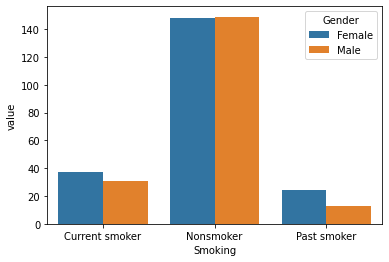

In [ ]:
 # now stack and reset
stacked = ct.stack().reset_index().rename(columns={0:'value'})

 # plot grouped bar chart
sns.barplot(x=stacked.Smoking, y=stacked.value, hue=stacked.Gender)

## Manuel Calculation

<table border="1" cellspacing="0">
    <tbody>
        <tr>
            <td width="100">&nbsp;</td>
            <td width="100"><b>Female</b></td>
            <td width="100"><b>Male</b></td>
            <td width="100"><b>Total</b></td>
        </tr>
        <tr>
            <td width="100"><b>Current smoker</b></td>
            <td width="100">37</td>
            <td width="100">31</td>
            <td width="100">68</td>
        </tr>
        <tr>
            <td width="100"><b>Nonsmoker</b></td>
            <td width="100">148</td>
            <td width="100">149</td>
            <td width="100">297</td>
        </tr>
        <tr>
            <td width="100"><b>Past smoker</b></td>
            <td width="100">24</td>
            <td width="100">13</td>
            <td width="100">37</td>
        </tr>
        <tr>
            <td width="100"><b>Total</b></td>
            <td width="100">209</td>
            <td width="100">193</td>
            <td width="100"><b>402</b></td>
        </tr>
    </tbody>
</table><br>

<table border="1" cellspacing="0">
    <tbody>
        <tr>
            <td width="100"><b>Expected Values</b></td>
            <td width="100"><b>Female</b></td>
            <td width="100"><b>Male</b></td>
            <td width="100"><b>Total</b></td>
        </tr>
        <tr>
            <td width="100"><b>Current smoker</b></td>
            <td width="100"><span aria-hidden="true">\(  \frac{209*68}{402}  \)​=35.353</span></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{193*68}{402} \)​<span aria-hidden="true">​=32.647</span></td>
            <td width="100">68</td>
        </tr>
        <tr>
            <td width="100"><b>Nonsmoker</b></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{209*297}{402} \)<span aria-hidden="true">=154.41</span></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{193*297}{402} \)​<span aria-hidden="true">​</span><span aria-hidden="true">​=142.59</span></td>
            <td
                width="100">297</td>
        </tr>
        <tr>
            <td width="100"><b>Past smoker</b></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{209*37}{402} \)​<span aria-hidden="true">​=19.236</span></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{193*37}{402} \)​<span aria-hidden="true">​</span><span aria-hidden="true">​=17.764</span></td>
            <td
                width="100">37</td>
        </tr>
        <tr>
            <td width="100"><b>Total</b></td>
            <td width="100">209</td>
            <td width="100">193</td>
            <td width="100"><b>402</b></td>
        </tr>
    </tbody>
</table>
<p><br></p>

<table border="1" cellspacing="0">
    <tbody>
        <tr>
            <td width="100"><b>Squared Distances</b></td>
            <td width="100"><b>Female</b></td>
            <td width="100"><b>Male</b></td>
        </tr>
        <tr>
            <td width="100"><b>Current smoker</b></td>
            <td width="100"><span aria-hidden="true">\(  \frac{ (37−35.353)^2 }{35.353}  \)=0.077</span></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{ (31−32.647)^2 }{32.647} \)<span aria-hidden="true">​=0.083</span></td>
        </tr>
        <tr>
            <td width="100"><b>Nonsmoker</b></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{ (148−154.41)^2 }{154.41} \)<span aria-hidden="true">=0.266</span></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{ (149−142.59)^2 }{142.59} \)<span aria-hidden="true">​=0.288</span></td>
        </tr>
        <tr>
            <td width="100"><b>Past smoker</b></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{ (24−19.236)^2 }{19.236} \)<span aria-hidden="true">=1.18</span></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{ (13−17.764)^2 }{17.764} \)<span aria-hidden="true">=1.277</span></td>
        </tr>
    </tbody>
</table>
<p><br></p>

![image.png](attachment:image.png)

χ2 = 0.077+0.266+1.18+0.083+0.288+1.277 = **3.171**

In [ ]:
g, p, dof, expctd = stats.chi2_contingency(ct)

In [ ]:
print("statistic:",g)
print("p value:",p)

statistic: 3.171256766693158
p value: 0.20481904779163018


![image.png](attachment:image.png)

Since the p-value is greater than our chosen significance level (α = 0.05), we do not reject the null hypothesis. Rather, we conclude that there is not enough evidence to suggest an association between gender and smoking.

Based on the results, we can state the following:

No association was found between gender and smoking behavior (Χ2(2)> = 3.171, p = 0.205).

## PROBLEM STATEMENT

Test the association between **class rank** and **living on campus** using a Chi-Square Test of Independence (using α = 0.05).

In [ ]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 23 columns):
ids             435 non-null int64
bday            435 non-null object
enrolldate      435 non-null object
expgradate      435 non-null object
Rank            435 non-null object
Major           434 non-null object
Gender          435 non-null object
Athlete         435 non-null int64
Height          435 non-null object
Weight          435 non-null object
Smoking         435 non-null object
Sprint          435 non-null object
MileMinDur      435 non-null object
English         435 non-null object
Reading         435 non-null object
Math            435 non-null object
Writing         435 non-null object
State           435 non-null object
LiveOnCampus    435 non-null object
HowCommute      435 non-null object
CommuteTime     435 non-null object
SleepTime       435 non-null object
StudyTime       435 non-null object
dtypes: int64(2), object(21)
memory usage: 78.3+ KB
